In [38]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
# load business.json
filepath = '../../yelp_dataset'

business = []
for l in open(filepath+"/business.json", encoding="utf8").readlines():
    business.append(json.loads(l))
df_business = pd.DataFrame.from_records(business)


In [40]:
# load data from previous preprocessing/EDA
filepath = '../../'

df_restaurant_tips = pd.read_json(filepath+"restaurant_tips.json", encoding="utf8")

In [41]:
# Filter businesses that are only in the 'Restaurant' category
def check_for_rest(row):
    category = row['categories']
    if category:
        tokens = category.split(', ')
        return 'Restaurants' in tokens
    return False

df_business['is_restaurant'] = df_business.apply(check_for_rest, axis=1)

food_businesses = df_business[df_business['is_restaurant'] == True]

# Get the unique IDs for all the businesses that are resturaunts
restaurant_ids  = set(food_businesses['business_id'].unique())

print('Total Unique ID count:',len(restaurant_ids))

Total Unique ID count: 59371


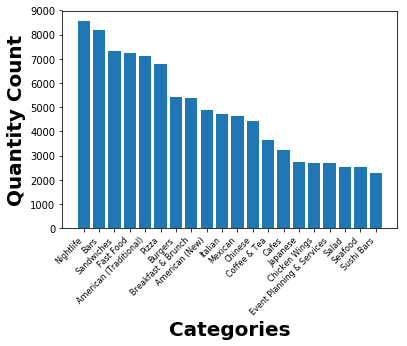

In [42]:
categories_series = food_businesses['categories']

cuisine_counts = {}
for _, categories in categories_series.iteritems():
    tokens = categories.split(', ')
    for category in tokens:
        if category == 'Restaurants'or category == 'Food':
            do = 'nothing' 
        elif category in cuisine_counts:
            cuisine_counts[category] += 1
        else:
            cuisine_counts[category] = 1

sorted_cuisine_counts = {k: v for k, v in sorted(cuisine_counts.items(), key=lambda item: item[1])}

top_20 = dict(list(sorted_cuisine_counts.items())[-20:]) 

x = list(top_20.keys())
x.reverse()
x = np.array(x)
y = list(top_20.values())
y.reverse()
y = np.array(y)


fig, ax = plt.subplots()
plt.bar(x, y)
plt.xticks(x, x, color='black', rotation=45, fontsize='8', horizontalalignment='right')
plt.xlabel("Categories", fontweight='bold', fontsize='20')
plt.ylabel("Quantity Count", fontweight='bold', fontsize='20')

plt.show()

In [43]:
# Modifying DF['categories'] to make filtering more efficient
# def split_category(row):
#     return row['categories'].split(',  ')

# food_businesses['categories'] = food_businesses.apply(split_category, axis=1)

In [44]:
# CUISINES WE WILL EXPLORE:
# Fast Food, American (Traditional), American (New), Italian, Mexican, Chinese, Japanese
def is_fast_food(row):
    category = row['categories']
    if category:
        tokens = category.split(', ')
        return 'Fast Food' in tokens
    return False

def is_american_traditional(row):
    category = row['categories']
    if category:
        tokens = category.split(', ')
        return 'American (Traditional)' in tokens
    return False

def is_american_new(row):
    category = row['categories']
    if category:
        tokens = category.split(', ')
        return 'American (New)' in tokens
    return False

# Fast Food
food_businesses['is_fast_food'] = food_businesses.apply(is_fast_food, axis=1)
df_fast_food = food_businesses[food_businesses['is_fast_food'] == True]

# American (Traditional)
food_businesses['is_american_t'] = food_businesses.apply(is_american_traditional, axis=1)
df_american_t = food_businesses[food_businesses['is_american_t'] == True]

# American (New)
food_businesses['is_american_n'] = food_businesses.apply(is_american_new, axis=1)
df_american_n = food_businesses[food_businesses['is_american_n'] == True]

c:\users\casey\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\casey\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\casey\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [45]:
# get tips for Fast Food mapped to business_id
fast_food_ids = set(df_fast_food.business_id.unique())
american_t_ids = set(df_american_t.business_id.unique())
american_n_ids = set(df_american_n.business_id.unique())

# group tips

cuisine_tips_fast_food = df_restaurant_tips[df_restaurant_tips['business_id'].isin(fast_food_ids)]
cuisine_tips_american_t = df_restaurant_tips[df_restaurant_tips['business_id'].isin(american_t_ids)]
cuisine_tips_american_n = df_restaurant_tips[df_restaurant_tips['business_id'].isin(american_n_ids)]


In [46]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

def get_sentiment(sentence):
    dic = analyser.polarity_scores(sentence)
    # dic -> {'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'compound': -0.5423}
    # for some reason only allows dictionary return type
    return dic

def get_positive_sentiment(row):
    sentence = row['text']
    dic = get_sentiment(sentence)
    return dic['pos'] #score is normalized between 0-1

In [47]:
# Find sentiment analysis for each tip
cuisine_tips_fast_food['text_sentiment'] = cuisine_tips_fast_food.apply(get_positive_sentiment, axis=1)
cuisine_tips_american_t['text_sentiment'] = cuisine_tips_american_t.apply(get_positive_sentiment, axis=1)
cuisine_tips_american_n['text_sentiment'] = cuisine_tips_american_n.apply(get_positive_sentiment, axis=1)

c:\users\casey\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\casey\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\casey\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be s

In [48]:
#seperate into meal times
breakfast_times = set([5,6,7,8,9,10])
lunch_times = set([11,12,13,14,15,16])
dinner_time = set([17,18,19,20,21,22])

#fast food tips
fast_food_tips_breakfast = cuisine_tips_fast_food[cuisine_tips_fast_food['local_hour'].isin(breakfast_times)]
fast_food_tips_lunch = cuisine_tips_fast_food[cuisine_tips_fast_food['local_hour'].isin(lunch_times)]
fast_food_tips_dinner = cuisine_tips_fast_food[cuisine_tips_fast_food['local_hour'].isin(dinner_time)]

#american traditional tips
american_t_tips_breakfast = cuisine_tips_american_t[cuisine_tips_american_t['local_hour'].isin(breakfast_times)]
american_t_tips_lunch = cuisine_tips_american_t[cuisine_tips_american_t['local_hour'].isin(lunch_times)]
american_t_tips_dinner = cuisine_tips_american_t[cuisine_tips_american_t['local_hour'].isin(dinner_time)]

#american new tips
american_n_tips_breakfast = cuisine_tips_american_n[cuisine_tips_american_n['local_hour'].isin(breakfast_times)]
american_n_tips_lunch = cuisine_tips_american_n[cuisine_tips_american_n['local_hour'].isin(lunch_times)]
american_n_tips_dinner = cuisine_tips_american_n[cuisine_tips_american_n['local_hour'].isin(dinner_time)]


In [49]:
# print(df_restaurant_tips)

In [50]:
def find_avg_tip_sentiment(row, df_tips):
    business_id = row['business_id']
    tips_with_this_business = df_tips[df_tips['business_id'] == business_id]
    return tips_with_this_business['text_sentiment'].mean()

In [51]:
# Find average sentiment for each business separated by meal times

# Fast food businesses
fast_food_businesses_breakfast_sentiment = pd.DataFrame({'business_id': list(fast_food_tips_breakfast['business_id'].unique())})
fast_food_businesses_breakfast_sentiment['avg_tip_sentiment'] = \
    fast_food_businesses_breakfast_sentiment.apply(lambda row: find_avg_tip_sentiment(row, fast_food_tips_breakfast), axis=1)

fast_food_businesses_lunch_sentiment = pd.DataFrame({'business_id': list(fast_food_tips_lunch['business_id'].unique())})
fast_food_businesses_lunch_sentiment['avg_tip_sentiment'] = \
    fast_food_businesses_lunch_sentiment.apply(lambda row: find_avg_tip_sentiment(row, fast_food_tips_lunch), axis=1)

fast_food_businesses_dinner_sentiment = pd.DataFrame({'business_id': list(fast_food_tips_dinner['business_id'].unique())})
fast_food_businesses_dinner_sentiment['avg_tip_sentiment'] = \
    fast_food_businesses_dinner_sentiment.apply(lambda row: find_avg_tip_sentiment(row, fast_food_tips_dinner), axis=1)

# American traditional businesses
american_t_businesses_breakfast_sentiment = pd.DataFrame({'business_id': list(american_t_tips_breakfast['business_id'].unique())})
american_t_businesses_breakfast_sentiment['avg_tip_sentiment'] = \
    american_t_businesses_breakfast_sentiment.apply(lambda row: find_avg_tip_sentiment(row, american_t_tips_breakfast), axis=1)

american_t_businesses_lunch_sentiment = pd.DataFrame({'business_id': list(american_t_tips_lunch['business_id'].unique())})
american_t_businesses_lunch_sentiment['avg_tip_sentiment'] = \
    american_t_businesses_lunch_sentiment.apply(lambda row: find_avg_tip_sentiment(row, american_t_tips_lunch), axis=1)

american_t_businesses_dinner_sentiment = pd.DataFrame({'business_id': list(american_t_tips_dinner['business_id'].unique())})
american_t_businesses_dinner_sentiment['avg_tip_sentiment'] = \
    american_t_businesses_dinner_sentiment.apply(lambda row: find_avg_tip_sentiment(row, american_t_tips_dinner), axis=1)

# American new businesses
american_n_businesses_breakfast_sentiment = pd.DataFrame({'business_id': list(american_n_tips_breakfast['business_id'].unique())})
american_n_businesses_breakfast_sentiment['avg_tip_sentiment'] = \
    american_n_businesses_breakfast_sentiment.apply(lambda row: find_avg_tip_sentiment(row, american_n_tips_breakfast), axis=1)

american_n_businesses_lunch_sentiment = pd.DataFrame({'business_id': list(american_n_tips_lunch['business_id'].unique())})
american_n_businesses_lunch_sentiment['avg_tip_sentiment'] = \
    american_n_businesses_lunch_sentiment.apply(lambda row: find_avg_tip_sentiment(row, american_n_tips_lunch), axis=1)

american_n_businesses_dinner_sentiment = pd.DataFrame({'business_id': list(american_n_tips_dinner['business_id'].unique())})
american_n_businesses_dinner_sentiment['avg_tip_sentiment'] = \
    american_n_businesses_dinner_sentiment.apply(lambda row: find_avg_tip_sentiment(row, american_n_tips_dinner), axis=1)


In [52]:
# Find average sentiment for each meal time and cuisine

#fast food tips
fast_food_breakfast_avg_sentiment = fast_food_tips_breakfast['text_sentiment'].mean()
fast_food_lunch_avg_sentiment = fast_food_tips_lunch['text_sentiment'].mean()
fast_food_dinner_avg_sentiment = fast_food_tips_dinner['text_sentiment'].mean()
print('Fast Food Average Sentiment')
print('Breakfast', fast_food_breakfast_avg_sentiment)
print('Lunch', fast_food_lunch_avg_sentiment)
print('Dinner', fast_food_dinner_avg_sentiment, '\n')

#american traditional tips
american_t_breakfast_avg_sentiment = american_t_tips_breakfast['text_sentiment'].mean()
american_t_lunch_avg_sentiment = american_t_tips_lunch['text_sentiment'].mean()
american_t_dinner_avg_sentiment = american_t_tips_dinner['text_sentiment'].mean()
print('American(Traditional) Average Sentiment')
print('Breakfast', american_t_breakfast_avg_sentiment)
print('Lunch', american_t_lunch_avg_sentiment)
print('Dinner', american_t_dinner_avg_sentiment, '\n')

#american new tips
american_n_breakfast_avg_sentiment = american_n_tips_breakfast['text_sentiment'].mean()
american_n_lunch_avg_sentiment = american_n_tips_lunch['text_sentiment'].mean()
american_n_dinner_avg_sentiment = american_n_tips_dinner['text_sentiment'].mean()
print('American (New) Average Sentiment')
print('Breakfast', american_n_breakfast_avg_sentiment)
print('Lunch', american_n_lunch_avg_sentiment)
print('Dinner', american_n_dinner_avg_sentiment)


Fast Food Average Sentiment
Breakfast 0.2213416063426405
Lunch 0.2443311774930272
Dinner 0.23666857515244616 

American(Traditional) Average Sentiment
Breakfast 0.2885007468259895
Lunch 0.2877473850913377
Dinner 0.2789951294708015 

American (New) Average Sentiment
Breakfast 0.28987180729563233
Lunch 0.29474464157522307
Dinner 0.2924089559172432


In [53]:
# find averge sentiment per business id based on tips for each meal time

# FAST FOOD
fast_food_breakfast_ids = fast_food_tips_breakfast['business_id'].unique()

fast_food_breakfast_ids_to_sentiment = {}
for ID in fast_food_breakfast_ids:
    temp = fast_food_tips_breakfast[fast_food_tips_breakfast['business_id'] == ID]
    fast_food_breakfast_ids_to_sentiment[ID] = temp['text_sentiment'].mean()

    
fast_food_lunch_ids = fast_food_tips_lunch['business_id'].unique()

fast_food_lunch_ids_to_sentiment = {}
for ID in fast_food_lunch_ids:
    temp = fast_food_tips_lunch[fast_food_tips_lunch['business_id'] == ID]
    fast_food_lunch_ids_to_sentiment[ID] = temp['text_sentiment'].mean()

    
fast_food_dinner_ids = fast_food_tips_dinner['business_id'].unique()

fast_food_dinner_ids_to_sentiment = {}
for ID in fast_food_dinner_ids:
    temp = fast_food_tips_dinner[fast_food_tips_dinner['business_id'] == ID]
    fast_food_dinner_ids_to_sentiment[ID] = temp['text_sentiment'].mean()
    

In [54]:
# AMERICAN TRADITIONAL
american_t_breakfast_ids = american_t_tips_breakfast['business_id'].unique()

american_t_breakfast_ids_to_sentiment = {}
for ID in american_t_tips_breakfast:
    temp = american_t_tips_breakfast[american_t_tips_breakfast['business_id'] == ID]
    american_t_breakfast_ids_to_sentiment[ID] = temp['text_sentiment'].mean()

    
american_t_lunch_ids = american_t_tips_lunch['business_id'].unique()

american_t_lunch_ids_to_sentiment = {}
for ID in american_t_tips_lunch:
    temp = american_t_tips_lunch[american_t_tips_lunch['business_id'] == ID]
    american_t_lunch_ids_to_sentiment[ID] = temp['text_sentiment'].mean()
    
    
american_t_dinner_ids = american_t_tips_dinner['business_id'].unique()

american_t_dinner_ids_to_sentiment = {}
for ID in american_t_tips_dinner:
    temp = american_t_tips_dinner[american_t_tips_dinner['business_id'] == ID]
    american_t_dinner_ids_to_sentiment[ID] = temp['text_sentiment'].mean()
    

In [55]:
# AMERICAN NEW
american_n_breakfast_ids = american_n_tips_breakfast['business_id'].unique()

american_n_breakfast_ids_to_sentiment = {}
for ID in american_n_tips_breakfast:
    temp = american_n_tips_breakfast[american_n_tips_breakfast['business_id'] == ID]
    american_n_breakfast_ids_to_sentiment[ID] = temp['text_sentiment'].mean()

    
american_n_lunch_ids = american_n_tips_lunch['business_id'].unique()

american_n_lunch_ids_to_sentiment = {}
for ID in american_n_tips_lunch:
    temp = american_n_tips_lunch[american_n_tips_lunch['business_id'] == ID]
    american_n_lunch_ids_to_sentiment[ID] = temp['text_sentiment'].mean()
    
    
american_n_dinner_ids = american_n_tips_dinner['business_id'].unique()

american_n_dinner_ids_to_sentiment = {}
for ID in american_n_tips_dinner:
    temp = american_n_tips_dinner[american_n_tips_dinner['business_id'] == ID]
    american_n_dinner_ids_to_sentiment[ID] = temp['text_sentiment'].mean()
    

In [118]:
# Romantic, Intimate, Hipster, Classy, 
# Create Dataset for breakfast first
def get_features(row, sentiment):
    try:
        attributes = row['attributes']
        print(attributes)
        return
        romantic = None
        hipster = None
        classy = None
        return
        try:
            romantic = bool_to_bit(attributes['Romantic'])
        except:
            romantic = 0
        try:
            hispter = bool_to_bit(attributes["Hipster"])
        except:
            hipster = 0
        try:
            classy = bool_to_bit(attribute['Classy'])
        except:
            classy = 0
        return [romantic, hipster, classy, sentiment]
    except:
        return None

def bool_to_bit(x):
    return int(x == True)

# GET FEATURE FOR FAST_FOOD_BREAKFAST
fast_food_breakfast_x = []
for ID in fast_food_breakfast_ids:
    row = df_fast_food.loc[df_fast_food['business_id'] == ID]
    sentiment = fast_food_breakfast_ids_to_sentiment[ID]
    features = get_features(row, sentiment)
    print(features)
    if features != None:
        fast_food_breakfast_x.append(features)
    
# # GET FEATURES FOR AMERICAN TRADITIONAL BREAKFAST
# american_t_breakfast_x = []
# missing_ids_american_t = []
# for ID in american_t_breakfast_ids:
#     try: #data set is not consistent. only adding if business id is present
#         row = df_american_t.loc[df_american_t['business_id'] == ID]
#         sentiment = american_t_breakfast_ids_to_sentiment[ID]
#         features = get_features(row, sentiment)
#         american_t_breakfast_x.append(features)
#     except:
#         missing_ids_american_t.append(ID)
    
# # GET FEATURES FOR AMERICAN NEW BREAKFAST
# american_n_breakfast_x = []
# missing_ids_american_n = []
# for ID in american_n_breakfast_ids:
#     try:
#         row = df_american_n.loc[df_american_n['business_id'] == ID]
#         sentiment = american_n_breakfast_ids_to_sentiment[ID]
#         features = get_features(row, sentiment)
#         american_n_breakfast_x.append(features)
#     except:
#         missing_ids_american_n.append(ID)

80943    {'RestaurantsTableService': 'False', 'Ambience...
Name: attributes, dtype: object
None
102862    {'GoodForMeal': '{'dessert': False, 'latenight...
Name: attributes, dtype: object
None
14512    {'OutdoorSeating': 'False', 'Ambience': '{'rom...
Name: attributes, dtype: object
None
179488    {'GoodForKids': 'True', 'BusinessAcceptsCredit...
Name: attributes, dtype: object
None
49593    {'RestaurantsReservations': 'True', 'Restauran...
Name: attributes, dtype: object
None
81141    {'Ambience': '{'romantic': False, 'intimate': ...
Name: attributes, dtype: object
None
186239    {'RestaurantsAttire': 'u'casual'', 'Restaurant...
Name: attributes, dtype: object
None
133486    {'OutdoorSeating': 'True', 'BusinessAcceptsCre...
Name: attributes, dtype: object
None
102900    {'GoodForKids': 'True', 'RestaurantsDelivery':...
Name: attributes, dtype: object
None
74955    {'RestaurantsReservations': 'False', 'Restaura...
Name: attributes, dtype: object
None
16602    {'RestaurantsDelivery': 'F

None
152521    {'NoiseLevel': ''average'', 'OutdoorSeating': ...
Name: attributes, dtype: object
None
13833    {'Caters': 'True', 'RestaurantsReservations': ...
Name: attributes, dtype: object
None
160781    {'Caters': 'False', 'RestaurantsPriceRange2': ...
Name: attributes, dtype: object
None
138532    {'RestaurantsDelivery': 'False', 'RestaurantsT...
Name: attributes, dtype: object
None
10140    {'HasTV': 'False', 'Caters': 'False', 'Outdoor...
Name: attributes, dtype: object
None
67964    {'RestaurantsAttire': 'u'casual'', 'Restaurant...
Name: attributes, dtype: object
None
37693    {'WiFi': ''no'', 'BikeParking': 'False', 'HasT...
Name: attributes, dtype: object
None
27194    {'WiFi': ''free'', 'GoodForKids': 'True', 'Dri...
Name: attributes, dtype: object
None
191922    {'Alcohol': 'u'none'', 'Caters': 'False', 'Res...
Name: attributes, dtype: object
None
120437    {'RestaurantsGoodForGroups': 'True', 'GoodForK...
Name: attributes, dtype: object
None
34601    {'BusinessParking': '

15311    {'RestaurantsPriceRange2': '1', 'WiFi': ''free...
Name: attributes, dtype: object
None
124350    {'RestaurantsAttire': 'u'casual'', 'Alcohol': ...
Name: attributes, dtype: object
None
136679    {'BikeParking': 'True', 'RestaurantsPriceRange...
Name: attributes, dtype: object
None
133626    {'BikeParking': 'False', 'Alcohol': ''none'', ...
Name: attributes, dtype: object
None
171359    {'GoodForKids': 'True', 'Ambience': '{'tourist...
Name: attributes, dtype: object
None
45932    {'RestaurantsAttire': ''casual'', 'Ambience': ...
Name: attributes, dtype: object
None
167087    {'BikeParking': 'False', 'BusinessParking': '{...
Name: attributes, dtype: object
None
160999    {'DriveThru': 'False', 'DogsAllowed': 'False',...
Name: attributes, dtype: object
None
61702    {'WiFi': 'u'no'', 'GoodForKids': 'True', 'HasT...
Name: attributes, dtype: object
None
83787    {'RestaurantsPriceRange2': '1', 'BusinessParki...
Name: attributes, dtype: object
None
56046    {'RestaurantsAttire': ''c

30808    {'RestaurantsDelivery': 'False', 'RestaurantsR...
Name: attributes, dtype: object
None
96131    {'RestaurantsTakeOut': 'True', 'GoodForKids': ...
Name: attributes, dtype: object
None
180423    {'RestaurantsTakeOut': 'True', 'RestaurantsRes...
Name: attributes, dtype: object
None
46644    {'BikeParking': 'True', 'Ambience': '{'tourist...
Name: attributes, dtype: object
None
120513    {'RestaurantsTakeOut': 'True', 'Ambience': '{'...
Name: attributes, dtype: object
None
188221    {'RestaurantsPriceRange2': '1', 'RestaurantsTa...
Name: attributes, dtype: object
None
68286    {'Caters': 'False', 'NoiseLevel': 'u'quiet'', ...
Name: attributes, dtype: object
None
72546    {'BusinessAcceptsCreditCards': 'True', 'Restau...
Name: attributes, dtype: object
None
7682    {'RestaurantsGoodForGroups': 'True', 'GoodForK...
Name: attributes, dtype: object
None
56472    {'Ambience': '{'touristy': False, 'hipster': F...
Name: attributes, dtype: object
None
161541    {'Caters': 'True', 'OutdoorS

None
24696    {'RestaurantsGoodForGroups': 'True', 'GoodForM...
Name: attributes, dtype: object
None
174910    {'Caters': 'False', 'Alcohol': ''none'', 'Rest...
Name: attributes, dtype: object
None
32174    {'RestaurantsTakeOut': 'True', 'RestaurantsRes...
Name: attributes, dtype: object
None
144454    {'BusinessParking': '{'garage': False, 'street...
Name: attributes, dtype: object
None
77145    {'WiFi': 'u'no'', 'RestaurantsDelivery': 'Fals...
Name: attributes, dtype: object
None
8679    {'RestaurantsReservations': 'False', 'HasTV': ...
Name: attributes, dtype: object
None
157961    {'RestaurantsAttire': 'u'casual'', 'Restaurant...
Name: attributes, dtype: object
None
55133    {'BusinessParking': '{'garage': False, 'street...
Name: attributes, dtype: object
None
83048    {'Caters': 'True', 'RestaurantsReservations': ...
Name: attributes, dtype: object
None
171361    {'Corkage': 'False', 'Caters': 'True', 'GoodFo...
Name: attributes, dtype: object
None
170772    {'RestaurantsDelivery'

None
191523    {'BikeParking': 'False', 'Alcohol': 'u'none'',...
Name: attributes, dtype: object
None
153679    {'BikeParking': 'True', 'Caters': 'False', 'Ha...
Name: attributes, dtype: object
None
56242    {'BikeParking': 'True', 'BusinessAcceptsCredit...
Name: attributes, dtype: object
None
168075    {'GoodForKids': 'True', 'BusinessAcceptsCredit...
Name: attributes, dtype: object
None
182590    {'Caters': 'True', 'HasTV': 'False', 'GoodForK...
Name: attributes, dtype: object
None
161098    {'OutdoorSeating': 'True', 'WiFi': 'u'free'', ...
Name: attributes, dtype: object
None
10212    {'Caters': 'False', 'BikeParking': 'True', 'Re...
Name: attributes, dtype: object
None
76099    {'GoodForKids': 'True', 'RestaurantsTakeOut': ...
Name: attributes, dtype: object
None
167857    {'Caters': 'False', 'BusinessParking': '{'gara...
Name: attributes, dtype: object
None
192310    {'HasTV': 'True', 'RestaurantsGoodForGroups': ...
Name: attributes, dtype: object
None
78687    {'Ambience': '{'tou

20247    {'RestaurantsAttire': ''casual'', 'Alcohol': '...
Name: attributes, dtype: object
None
40991    {'RestaurantsPriceRange2': '1', 'OutdoorSeatin...
Name: attributes, dtype: object
None
154224    {'RestaurantsTakeOut': 'True', 'GoodForKids': ...
Name: attributes, dtype: object
None
67122    {'RestaurantsReservations': 'False', 'Restaura...
Name: attributes, dtype: object
None
140205    {'OutdoorSeating': 'False', 'WiFi': ''no'', 'R...
Name: attributes, dtype: object
None
125813    {'OutdoorSeating': 'False', 'DriveThru': 'Fals...
Name: attributes, dtype: object
None
5907    {'RestaurantsGoodForGroups': 'False', 'Restaur...
Name: attributes, dtype: object
None
55086    {'RestaurantsGoodForGroups': 'True', 'Restaura...
Name: attributes, dtype: object
None
65249    {'BikeParking': 'True', 'RestaurantsGoodForGro...
Name: attributes, dtype: object
None
109310    {'BusinessAcceptsCreditCards': 'True', 'HasTV'...
Name: attributes, dtype: object
None
35543    {'GoodForMeal': '{'dessert':

20791    {'Caters': 'False', 'NoiseLevel': ''average'',...
Name: attributes, dtype: object
None
81838    {'GoodForKids': 'True', 'RestaurantsAttire': '...
Name: attributes, dtype: object
None
1906    {'Ambience': '{'romantic': False, 'intimate': ...
Name: attributes, dtype: object
None
114147    {'Alcohol': 'u'none'', 'NoiseLevel': 'u'averag...
Name: attributes, dtype: object
None
8745    {'BusinessParking': '{'garage': False, 'street...
Name: attributes, dtype: object
None
167440    {'NoiseLevel': 'u'average'', 'OutdoorSeating':...
Name: attributes, dtype: object
None
114545    {'BusinessParking': '{'garage': False, 'street...
Name: attributes, dtype: object
None
124952    {'WiFi': ''no'', 'RestaurantsPriceRange2': '1'...
Name: attributes, dtype: object
None
94710    {'GoodForMeal': '{'dessert': True, 'latenight'...
Name: attributes, dtype: object
None
137746    {'BikeParking': 'True', 'RestaurantsReservatio...
Name: attributes, dtype: object
None
164024    {'RestaurantsPriceRange2': 

None
75671    {'NoiseLevel': 'u'loud'', 'HasTV': 'False', 'B...
Name: attributes, dtype: object
None
36446    {'RestaurantsTakeOut': 'True', 'RestaurantsGoo...
Name: attributes, dtype: object
None
29188    {'HasTV': 'False', 'GoodForKids': 'True', 'WiF...
Name: attributes, dtype: object
None
119964    {'RestaurantsPriceRange2': '1', 'RestaurantsTa...
Name: attributes, dtype: object
None
96297    {'RestaurantsGoodForGroups': 'True', 'Restaura...
Name: attributes, dtype: object
None
57630    {'BusinessParking': '{'garage': False, 'street...
Name: attributes, dtype: object
None
188562    {'RestaurantsAttire': ''casual'', 'Restaurants...
Name: attributes, dtype: object
None
171405    {'BusinessParking': '{'garage': False, 'street...
Name: attributes, dtype: object
None
108930    None
Name: attributes, dtype: object
None
177536    {'Alcohol': ''beer_and_wine'', 'RestaurantsTab...
Name: attributes, dtype: object
None
135094    {'RestaurantsAttire': ''casual'', 'GoodForKids...
Name: attribute

Name: attributes, dtype: object
None
121359    {'Ambience': '{'romantic': False, 'intimate': ...
Name: attributes, dtype: object
None
7622    {'BusinessParking': '{'garage': False, 'street...
Name: attributes, dtype: object
None
70269    {'RestaurantsReservations': 'False', 'WiFi': '...
Name: attributes, dtype: object
None
105002    {'RestaurantsTableService': 'False', 'GoodForK...
Name: attributes, dtype: object
None
162317    {'Ambience': '{'touristy': False, 'hipster': F...
Name: attributes, dtype: object
None
171938    {'GoodForKids': 'True', 'BusinessAcceptsCredit...
Name: attributes, dtype: object
None
118881    {'Ambience': '{'romantic': False, 'intimate': ...
Name: attributes, dtype: object
None
154261    {'Alcohol': ''none'', 'RestaurantsGoodForGroup...
Name: attributes, dtype: object
None
76815    {'Caters': 'False', 'BusinessParking': '{'gara...
Name: attributes, dtype: object
None
156463    {'NoiseLevel': 'u'very_loud'', 'HasTV': 'True'...
Name: attributes, dtype: object
No

None
801    {'OutdoorSeating': 'False', 'WiFi': 'u'no'', '...
Name: attributes, dtype: object
None
75645    {'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...
Name: attributes, dtype: object
None
151739    {'RestaurantsDelivery': 'False', 'BikeParking'...
Name: attributes, dtype: object
None
118991    {'RestaurantsDelivery': 'False', 'RestaurantsT...
Name: attributes, dtype: object
None
41550    {'GoodForMeal': '{'dessert': False, 'latenight...
Name: attributes, dtype: object
None
152378    {'RestaurantsTakeOut': 'True', 'RestaurantsGoo...
Name: attributes, dtype: object
None
77961    {'RestaurantsPriceRange2': '1', 'RestaurantsDe...
Name: attributes, dtype: object
None
7555    {'RestaurantsAttire': ''casual'', 'BusinessAcc...
Name: attributes, dtype: object
None
33625    {'RestaurantsAttire': ''casual'', 'BusinessAcc...
Name: attributes, dtype: object
None
36518    {'WiFi': ''free'', 'RestaurantsDelivery': 'Fal...
Name: attributes, dtype: object
None
114541    {'WheelchairAccessible': 

98203    {'RestaurantsTakeOut': 'True', 'RestaurantsPri...
Name: attributes, dtype: object
None
48956    {'RestaurantsAttire': 'u'casual'', 'Alcohol': ...
Name: attributes, dtype: object
None
96437    {'GoodForKids': 'True', 'RestaurantsGoodForGro...
Name: attributes, dtype: object
None
12106    {'WiFi': ''free'', 'HasTV': 'False', 'Restaura...
Name: attributes, dtype: object
None
176082    {'RestaurantsReservations': 'False', 'Restaura...
Name: attributes, dtype: object
None
163354    {'BikeParking': 'True', 'BusinessParking': '{'...
Name: attributes, dtype: object
None
40318    {'GoodForKids': 'True', 'RestaurantsAttire': '...
Name: attributes, dtype: object
None
91985    {'RestaurantsTakeOut': 'True', 'RestaurantsGoo...
Name: attributes, dtype: object
None
121395    {'BusinessParking': '{'garage': False, 'street...
Name: attributes, dtype: object
None
95820    {'Caters': 'True', 'RestaurantsGoodForGroups':...
Name: attributes, dtype: object
None
190597    {'Ambience': '{'touristy': 

91062    {'GoodForMeal': '{'dessert': True, 'latenight'...
Name: attributes, dtype: object
None
160039    {'RestaurantsReservations': 'False', 'Restaura...
Name: attributes, dtype: object
None
146765    {'BusinessParking': '{'garage': False, 'street...
Name: attributes, dtype: object
None
156522    {'BikeParking': 'False', 'RestaurantsPriceRang...
Name: attributes, dtype: object
None
98024    {'GoodForKids': 'True', 'RestaurantsReservatio...
Name: attributes, dtype: object
None
59484    {'WheelchairAccessible': 'True', 'Alcohol': ''...
Name: attributes, dtype: object
None
99786    {'GoodForKids': 'True', 'RestaurantsReservatio...
Name: attributes, dtype: object
None
35822    {'BusinessParking': '{'garage': False, 'street...
Name: attributes, dtype: object
None
93271    {'GoodForKids': 'True', 'HasTV': 'False', 'Bus...
Name: attributes, dtype: object
None
114311    {'RestaurantsTakeOut': 'True', 'OutdoorSeating...
Name: attributes, dtype: object
None
190282    {'BusinessParking': '{'gar

Name: attributes, dtype: object
None
149149    {'RestaurantsGoodForGroups': 'True', 'Restaura...
Name: attributes, dtype: object
None
23802    {'Ambience': '{'romantic': False, 'intimate': ...
Name: attributes, dtype: object
None
36040    {'HasTV': 'False', 'BusinessAcceptsCreditCards...
Name: attributes, dtype: object
None
186127    {'Alcohol': ''beer_and_wine'', 'Caters': 'True...
Name: attributes, dtype: object
None
190657    {'Alcohol': 'u'none'', 'HasTV': 'False', 'Cate...
Name: attributes, dtype: object
None
23863    {'RestaurantsPriceRange2': '1', 'Alcohol': 'u'...
Name: attributes, dtype: object
None
182654    {'RestaurantsTakeOut': 'True', 'OutdoorSeating...
Name: attributes, dtype: object
None
132187    {'Ambience': '{'romantic': False, 'intimate': ...
Name: attributes, dtype: object
None
11905    {'RestaurantsGoodForGroups': 'True', 'Restaura...
Name: attributes, dtype: object
None
75679    {'RestaurantsAttire': ''casual'', 'Restaurants...
Name: attributes, dtype: object
Non

None
104929    {'RestaurantsTakeOut': 'True', 'GoodForKids': ...
Name: attributes, dtype: object
None
157455    {'Caters': 'False', 'RestaurantsTableService':...
Name: attributes, dtype: object
None
121682    {'RestaurantsReservations': 'False', 'Ambience...
Name: attributes, dtype: object
None
154315    {'RestaurantsDelivery': 'False', 'RestaurantsT...
Name: attributes, dtype: object
None
115819    {'RestaurantsTakeOut': 'True', 'BikeParking': ...
Name: attributes, dtype: object
None
179228    {'NoiseLevel': 'u'average'', 'BusinessParking'...
Name: attributes, dtype: object
None
158017    {'RestaurantsReservations': 'False', 'HasTV': ...
Name: attributes, dtype: object
None
72064    {'Caters': 'True', 'RestaurantsDelivery': 'Fal...
Name: attributes, dtype: object
None
91291    {'RestaurantsPriceRange2': '1', 'DriveThru': '...
Name: attributes, dtype: object
None
61940    {'Caters': 'True', 'BusinessParking': '{'garag...
Name: attributes, dtype: object
None
144844    {'RestaurantsGoodF

18465    {'RestaurantsPriceRange2': '1', 'BusinessAccep...
Name: attributes, dtype: object
None
60902    {'GoodForKids': 'True', 'RestaurantsAttire': '...
Name: attributes, dtype: object
None
87728    {'HasTV': 'False', 'NoiseLevel': ''quiet'', 'B...
Name: attributes, dtype: object
None
137745    {'BusinessAcceptsCreditCards': 'True', 'Restau...
Name: attributes, dtype: object
None
104178    {'RestaurantsTakeOut': 'True', 'RestaurantsDel...
Name: attributes, dtype: object
None
171867    {'Alcohol': 'u'none'', 'RestaurantsPriceRange2...
Name: attributes, dtype: object
None
191672    {'RestaurantsGoodForGroups': 'True', 'Restaura...
Name: attributes, dtype: object
None
164040    {'Alcohol': 'u'beer_and_wine'', 'Caters': 'Tru...
Name: attributes, dtype: object
None
66238    {'GoodForKids': 'True', 'Alcohol': 'u'none'', ...
Name: attributes, dtype: object
None
89741    {'RestaurantsReservations': 'False', 'Restaura...
Name: attributes, dtype: object
None
73254    {'Caters': 'True', 'WiFi':

Name: attributes, dtype: object
None
184115    {'Alcohol': 'u'none''}
Name: attributes, dtype: object
None
88801    {'GoodForKids': 'True', 'BikeParking': 'True',...
Name: attributes, dtype: object
None
109326    {'WiFi': ''no'', 'OutdoorSeating': 'True', 'Bu...
Name: attributes, dtype: object
None
12492    {'RestaurantsGoodForGroups': 'True', 'GoodForK...
Name: attributes, dtype: object
None
98060    {'RestaurantsAttire': 'u'casual'', 'Restaurant...
Name: attributes, dtype: object
None
88137    {'BusinessAcceptsCreditCards': 'True', 'Restau...
Name: attributes, dtype: object
None
114103    {'Ambience': '{'touristy': False, 'hipster': F...
Name: attributes, dtype: object
None
157878    {'HasTV': 'True', 'GoodForKids': 'True', 'Cate...
Name: attributes, dtype: object
None
104500    {'GoodForKids': 'True', 'BusinessAcceptsCredit...
Name: attributes, dtype: object
None
62232    {'WiFi': 'u'free''}
Name: attributes, dtype: object
None
136917    {'GoodForMeal': '{'dessert': False, 'latenigh

In [111]:
print(fast_food_breakfast_x)
# print(american_t_breakfast_x)
# print(american_n_breakfast_x)
# print(missing_ids_american_t)
# print(missing_ids_american_n)

[]
